In [1]:
import tensorflow.keras as keras
print(keras.__version__)
import tensorflow as tf
print(tf.__version__)


3.3.3
2.16.1


In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam#Optimizasyon algoritmasıdır 
#modelin kaybını (loss) en aza indirmek için kullanılır.

In [2]:
train_dir = "\\train"#dosya yolunu ekleyin
validation_dir = "\\validation"#dosya yolunu ekleyin

In [3]:
batch_size = 32
epochs = 50
img_size = 48

# Veri artırma ve normalizasyon
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

In [7]:
# Veri yükleyici
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',#binary de olabilirdi temel olarak aynı
    color_mode='grayscale'  
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    color_mode='grayscale'  
)


Found 12102 images belonging to 2 classes.
Found 2964 images belonging to 2 classes.


In [10]:
model = Sequential([ #yüksek seviye API, çıktı sonrakinin girdisi, kümeleme
    Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)), #özel bir çarpım var, kayan bir pencere, bir filtre
    MaxPooling2D((2, 2)),#resimden gelen önemli featurların alınması, en büyük çakışmayacak şekilde alınır
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),#tek boyuta indirgeme
    Dense(128, activation='relu'),
    Dense(2, activation='softmax')#çıkış katmanındaki aktivasyon fonksiyonu,iki nöron ,binary yerine categorical kullandığım için
])


C:\Users\LENOVO\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
# Model derleme
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Model eğitimi
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)

Epoch 1/50
378/378 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.6392 - loss: 0.6255 - val_accuracy: 0.7741 - val_loss: 0.4634
Epoch 2/50
378/378 ━━━━━━━━━━━━━━━━━━━━ 0s 92us/step - accuracy: 0.7500 - loss: 0.5031 - val_accuracy: 0.7500 - val_loss: 0.3371
Epoch 3/50
378/378 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 0.7953 - loss: 0.4299 - val_accuracy: 0.8264 - val_loss: 0.3762
Epoch 4/50
378/378 ━━━━━━━━━━━━━━━━━━━━ 0s 90us/step - accuracy: 0.8125 - loss: 0.2974 - val_accuracy: 0.6500 - val_loss: 0.6283
Epoch 5/50
378/378 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.8358 - loss: 0.3638 - val_accuracy: 0.8383 - val_loss: 0.3487
Epoch 6/50
378/378 ━━━━━━━━━━━━━━━━━━━━ 0s 80us/step - accuracy: 0.8125 - loss: 0.3260 - val_accuracy: 0.9000 - val_loss: 0.3293
Epoch 7/50
378/378 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 0.8645 - loss: 0.3117 - val_accuracy: 0.8512 - val_loss: 0.3345
Epoch 8/50
378/378 ━━━━━━━━━━━━━━━━━━━━ 0s 119us/step - accuracy: 0.8125 - loss: 0.3328 - val_ac

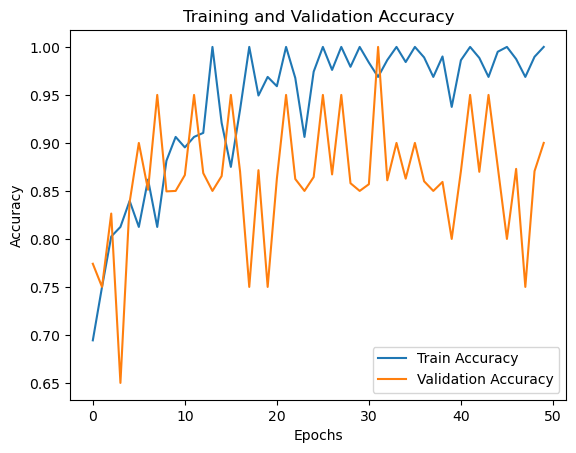

In [12]:
# Eğitim ve doğrulama doğruluklarını çizme
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

In [13]:
model.save("model.h5")